# Compare Linear Regression with Random Forest

## Libraries and settings

In [31]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error
import gradio as gr
from datetime import datetime

## Import the flight delay data

In [32]:
# Read and select variables
df_orig = pd.read_csv("zrh_flightdelay.csv", sep=",", encoding='utf-8')

# Remove missing values
df = df_orig.dropna()
# Remove duplicates
df = df.drop_duplicates()

print(df.shape)
df.head(10)

(7558, 21)


,DESTINATION,IATA_CODE,AIRLINE,AIRCRAFT,DATETIME,DEPART_TIME,DEPART_DATETIME,DELAY_MINUTES,DATETIME_HOUR,Weather_Condition,...,Dew_Point,Relative_Humidity,Total_Precipitation,Wind_Direction,Average_Wind_Speed,Wind_Peak_Gust,SeaLevel_Air_Pressure,DEST_CODE,AIRLINE_CODE,AIRCRAFT_CODE
0,Larnaca,LCA,Edelweiss Air,A320,2025-04-28 05:45:00,06:02,2025-04-28 06:02:00,17,2025-04-28 05:00:00,5,...,5.3,99,0.0,309,6,9.3,1025.3,120,52,5
1,Pristina,PRN,Chair Airlines,A319,2025-04-28 05:45:00,06:00,2025-04-28 06:00:00,15,2025-04-28 05:00:00,5,...,5.3,99,0.0,309,6,9.3,1025.3,189,41,4
2,London,LCY,Swiss,BCS1,2025-04-28 06:55:00,07:34,2025-04-28 07:34:00,39,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,130,141,28
3,Palma de Mallorca,PMI,Swiss,A321,2025-04-28 06:50:00,07:11,2025-04-28 07:11:00,21,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,176,141,6
4,Madrid,MAD,Helvetic Airways,E295,2025-04-28 06:55:00,07:13,2025-04-28 07:13:00,18,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,135,81,55
5,Belgrade,BEG,Swiss,BCS3,2025-04-28 06:55:00,07:14,2025-04-28 07:14:00,19,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,20,141,29
6,Brindisi,BDS,Swiss,A320,2025-04-28 06:50:00,07:17,2025-04-28 07:17:00,27,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,37,141,5
7,Hurghada,HRG,Chair Airlines,A320,2025-04-28 06:45:00,06:52,2025-04-28 06:52:00,7,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,99,41,5
8,Funchal,FNC,Edelweiss Air,A320,2025-04-28 06:45:00,07:00,2025-04-28 07:00:00,15,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,84,52,5
9,Bilbao,BIO,Edelweiss Air,A320,2025-04-28 06:45:00,07:02,2025-04-28 07:02:00,17,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,24,52,5


In [33]:
print(df.columns)

Index(['DESTINATION', 'IATA_CODE', 'AIRLINE', 'AIRCRAFT', 'DATETIME',
       'DEPART_TIME', 'DEPART_DATETIME', 'DELAY_MINUTES', 'DATETIME_HOUR',
       'Weather_Condition', 'Temperature', 'Dew_Point', 'Relative_Humidity',
       'Total_Precipitation', 'Wind_Direction', 'Average_Wind_Speed',
       'Wind_Peak_Gust', 'SeaLevel_Air_Pressure', 'DEST_CODE', 'AIRLINE_CODE',
       'AIRCRAFT_CODE'],
      dtype='object')


## Train/Test splitting

In [34]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['DEST_CODE', 'AIRLINE_CODE', 'AIRCRAFT_CODE', 'Weather_Condition', 'Temperature', 'Dew_Point', 'Relative_Humidity',
       'Total_Precipitation', 'Wind_Direction', 'Average_Wind_Speed', 'Wind_Peak_Gust', 'SeaLevel_Air_Pressure']], 
                                                         df['DELAY_MINUTES'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [35]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.0726450691634648
Test score:  0.07196480734423238
Train RMSE:  22.39093609763963
Test RMSE:  21.398473264523037


In [36]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.882187414128147
Test score:  0.10109117603217321
Train RMSE:  7.980775642248181
Test RMSE:  21.060000997669583


['DEST_CODE' 'AIRLINE_CODE' 'AIRCRAFT_CODE' 'Wind_Peak_Gust'
 'SeaLevel_Air_Pressure' 'Wind_Direction' 'Temperature'
 'Relative_Humidity' 'Dew_Point' 'Average_Wind_Speed' 'Weather_Condition'
 'Total_Precipitation']
[0.20600008 0.19120923 0.13073337 0.10152983 0.09916954 0.05089525
 0.04883095 0.04743362 0.04309054 0.03602439 0.03470734 0.01037587]


<Axes: ylabel='features'>

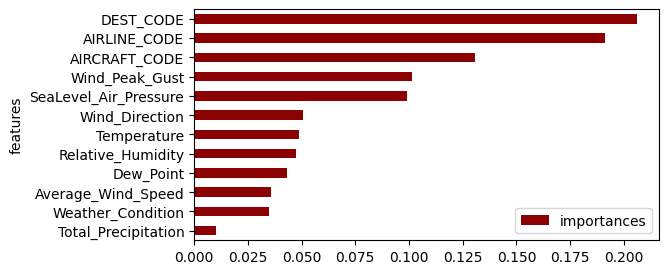

In [37]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

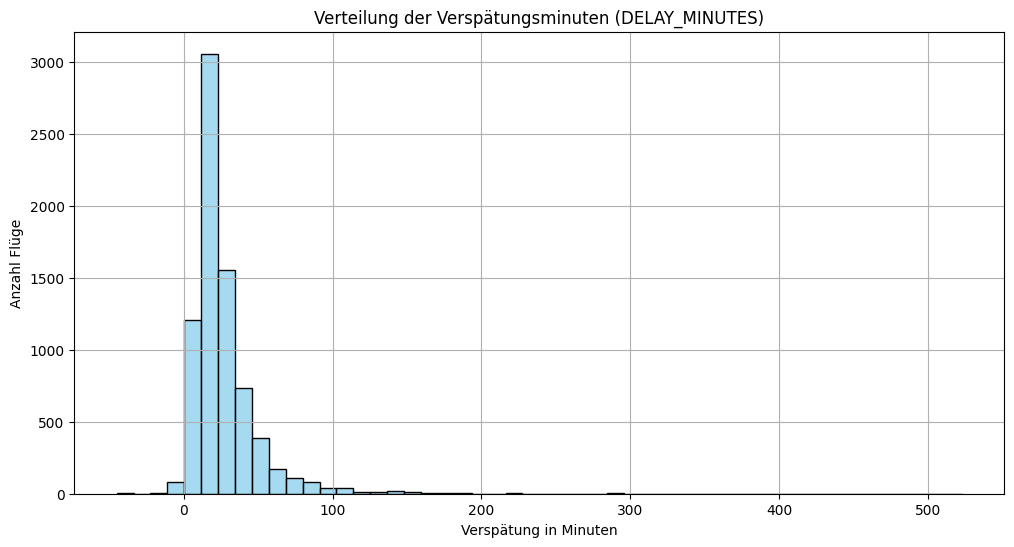

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(df["DELAY_MINUTES"], bins=50, kde=False, color="skyblue")

plt.title("Verteilung der Verspätungsminuten (DELAY_MINUTES)")
plt.xlabel("Verspätung in Minuten")
plt.ylabel("Anzahl Flüge")
plt.grid(True)
plt.show()


In [39]:
# Negative Werte auf 0 setzen
df["DELAY_MINUTES"] = df["DELAY_MINUTES"].clip(lower=0)

# Zeilen mit mehr als 120 Minuten Verspätung entfernen
df = df[df["DELAY_MINUTES"] <= 120]


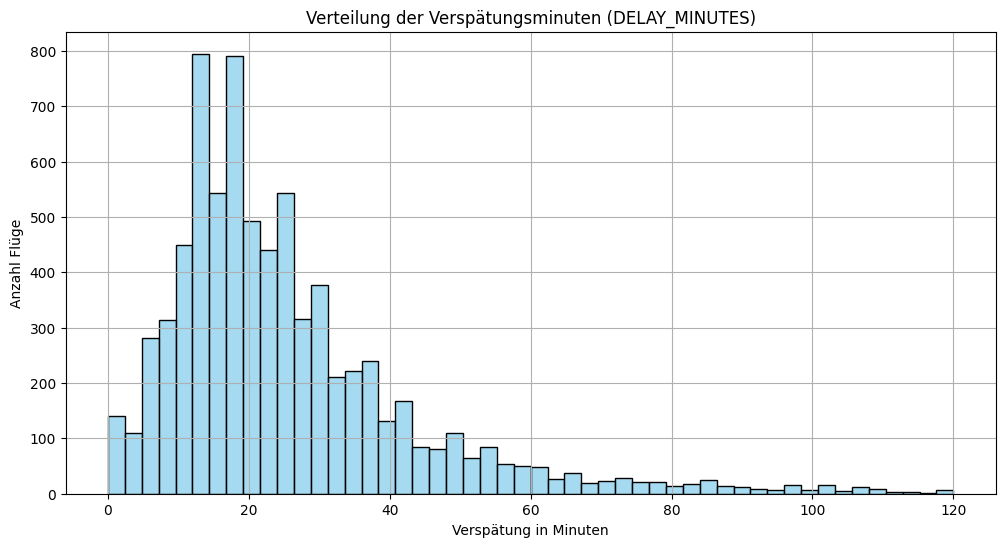

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(df["DELAY_MINUTES"], bins=50, kde=False, color="skyblue")

plt.title("Verteilung der Verspätungsminuten (DELAY_MINUTES)")
plt.xlabel("Verspätung in Minuten")
plt.ylabel("Anzahl Flüge")
plt.grid(True)
plt.show()


In [41]:
df.shape

(7487, 21)

In [42]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['DEST_CODE', 'AIRLINE_CODE', 'AIRCRAFT_CODE', 'Weather_Condition', 'Temperature', 'Dew_Point', 'Relative_Humidity',
       'Total_Precipitation', 'Wind_Direction', 'Average_Wind_Speed', 'Wind_Peak_Gust', 'SeaLevel_Air_Pressure']], 
                                                         df['DELAY_MINUTES'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [43]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.0839258548482621
Test score:  0.06596183516002319
Train RMSE:  17.015335501603737
Test RMSE:  18.26319321500446


In [44]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.8851517456744896
Test score:  0.17464441155685728
Train RMSE:  6.024727423937529
Test RMSE:  17.1678120832548


['DEST_CODE' 'AIRCRAFT_CODE' 'AIRLINE_CODE' 'Wind_Peak_Gust'
 'SeaLevel_Air_Pressure' 'Temperature' 'Wind_Direction' 'Dew_Point'
 'Relative_Humidity' 'Average_Wind_Speed' 'Weather_Condition'
 'Total_Precipitation']
[0.22865437 0.13816313 0.13212359 0.1190019  0.08718187 0.05999614
 0.05378894 0.05059357 0.04613634 0.03952085 0.0357655  0.00907379]


<Axes: ylabel='features'>

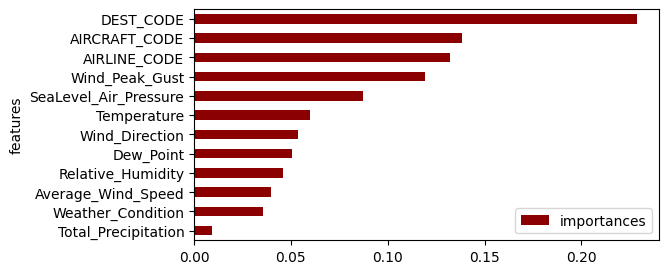

In [45]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

In [46]:
# Schritt 1: In datetime-Format umwandeln (falls noch nicht geschehen)
df["DATETIME"] = pd.to_datetime(df["DATETIME"])

# Schritt 2: Neue Spalte mit Wochentagszahl hinzufügen (Montag = 0, Sonntag = 6)
df["Weekday"] = df["DATETIME"].dt.weekday

# Weekday name
df["Weekday_name"] = df["DATETIME"].dt.day_name()



In [47]:
df.head(10)

,DESTINATION,IATA_CODE,AIRLINE,AIRCRAFT,DATETIME,DEPART_TIME,DEPART_DATETIME,DELAY_MINUTES,DATETIME_HOUR,Weather_Condition,...,Total_Precipitation,Wind_Direction,Average_Wind_Speed,Wind_Peak_Gust,SeaLevel_Air_Pressure,DEST_CODE,AIRLINE_CODE,AIRCRAFT_CODE,Weekday,Weekday_name
0,Larnaca,LCA,Edelweiss Air,A320,2025-04-28 05:45:00,06:02,2025-04-28 06:02:00,17,2025-04-28 05:00:00,5,...,0.0,309,6,9.3,1025.3,120,52,5,0,Monday
1,Pristina,PRN,Chair Airlines,A319,2025-04-28 05:45:00,06:00,2025-04-28 06:00:00,15,2025-04-28 05:00:00,5,...,0.0,309,6,9.3,1025.3,189,41,4,0,Monday
2,London,LCY,Swiss,BCS1,2025-04-28 06:55:00,07:34,2025-04-28 07:34:00,39,2025-04-28 06:00:00,5,...,0.0,192,3,8.0,1025.2,130,141,28,0,Monday
3,Palma de Mallorca,PMI,Swiss,A321,2025-04-28 06:50:00,07:11,2025-04-28 07:11:00,21,2025-04-28 06:00:00,5,...,0.0,192,3,8.0,1025.2,176,141,6,0,Monday
4,Madrid,MAD,Helvetic Airways,E295,2025-04-28 06:55:00,07:13,2025-04-28 07:13:00,18,2025-04-28 06:00:00,5,...,0.0,192,3,8.0,1025.2,135,81,55,0,Monday
5,Belgrade,BEG,Swiss,BCS3,2025-04-28 06:55:00,07:14,2025-04-28 07:14:00,19,2025-04-28 06:00:00,5,...,0.0,192,3,8.0,1025.2,20,141,29,0,Monday
6,Brindisi,BDS,Swiss,A320,2025-04-28 06:50:00,07:17,2025-04-28 07:17:00,27,2025-04-28 06:00:00,5,...,0.0,192,3,8.0,1025.2,37,141,5,0,Monday
7,Hurghada,HRG,Chair Airlines,A320,2025-04-28 06:45:00,06:52,2025-04-28 06:52:00,7,2025-04-28 06:00:00,5,...,0.0,192,3,8.0,1025.2,99,41,5,0,Monday
8,Funchal,FNC,Edelweiss Air,A320,2025-04-28 06:45:00,07:00,2025-04-28 07:00:00,15,2025-04-28 06:00:00,5,...,0.0,192,3,8.0,1025.2,84,52,5,0,Monday
9,Bilbao,BIO,Edelweiss Air,A320,2025-04-28 06:45:00,07:02,2025-04-28 07:02:00,17,2025-04-28 06:00:00,5,...,0.0,192,3,8.0,1025.2,24,52,5,0,Monday


In [48]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['DEST_CODE', 'AIRLINE_CODE', 'AIRCRAFT_CODE', 'Weather_Condition', 'Temperature', 'Dew_Point', 'Relative_Humidity',
       'Total_Precipitation', 'Wind_Direction', 'Average_Wind_Speed', 'Wind_Peak_Gust', 'SeaLevel_Air_Pressure', 'Weekday']], 
                                                         df['DELAY_MINUTES'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [49]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.09091669157479865
Test score:  0.0739375486458187
Train RMSE:  16.950286596141417
Test RMSE:  18.18505171763986


In [50]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.8846540407847866
Test score:  0.16959030687391163
Train RMSE:  6.037767651371804
Test RMSE:  17.22029582112928


['DEST_CODE' 'AIRCRAFT_CODE' 'AIRLINE_CODE' 'Wind_Peak_Gust'
 'SeaLevel_Air_Pressure' 'Temperature' 'Wind_Direction' 'Dew_Point'
 'Relative_Humidity' 'Average_Wind_Speed' 'Weather_Condition' 'Weekday'
 'Total_Precipitation']
[0.23073957 0.14007137 0.13423083 0.11800566 0.07453    0.05696483
 0.05023456 0.0455579  0.04316279 0.03936866 0.03252945 0.02732266
 0.00728174]


<Axes: ylabel='features'>

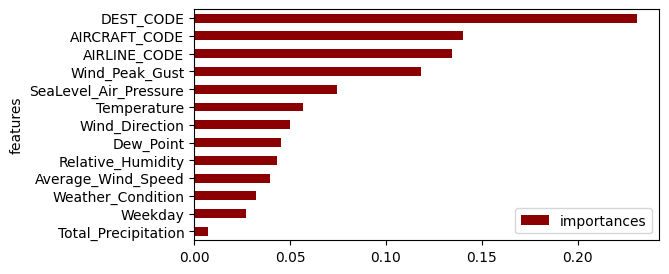

In [51]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

In [52]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['DEST_CODE', 'Wind_Peak_Gust','AIRLINE_CODE', 'AIRCRAFT_CODE', 'Wind_Direction', 'SeaLevel_Air_Pressure', 'Temperature']], 
                                                         df['DELAY_MINUTES'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [53]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.07442340351549936
Test score:  0.057931020828209
Train RMSE:  17.103357995516514
Test RMSE:  18.34153819363905


In [54]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.8856626431745954
Test score:  0.16877083614690203
Train RMSE:  6.011312118060421
Test RMSE:  17.22879045261057


['DEST_CODE' 'Wind_Peak_Gust' 'AIRCRAFT_CODE' 'SeaLevel_Air_Pressure'
 'AIRLINE_CODE' 'Temperature' 'Wind_Direction']
[0.23524904 0.14942096 0.14380468 0.14059008 0.13943145 0.10280706
 0.08869672]


<Axes: ylabel='features'>

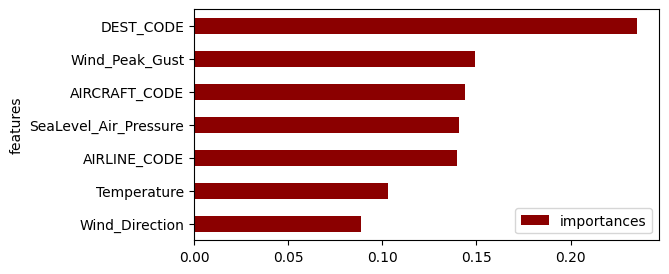

In [55]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='r2')
print("CV R² mean:", scores.mean())


CV R² mean: 0.1815715202333777


In [57]:
# Features (X) und Zielvariable (y) festlegen
X = df[['DEST_CODE', 'Wind_Peak_Gust','AIRLINE_CODE', 'AIRCRAFT_CODE', 'Wind_Direction', 'SeaLevel_Air_Pressure', 'Temperature']]
y = df['DELAY_MINUTES'] 

In [58]:
# Trainiere das Modell (Verwendung von RandomForestRegressor für Preisvorhersage)
model = RandomForestRegressor(random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")

# Train on the full dataset
model.fit(X, y)
train_accuracy = model.score(X, y)
print(f"Training accuracy: {train_accuracy:.4f}")

Cross-validation accuracy: -0.1019
Training accuracy: 0.8872


In [59]:
# Gradio-Vorhersagefunktion
def predict(DEST_CODE, AIRLINE_CODE, AIRCRAFT_CODE, SeaLevel_Air_Pressure, Wind_Direction, Wind_Peak_Gust, Temperature):
    input_data = [[DEST_CODE, AIRLINE_CODE, AIRCRAFT_CODE, SeaLevel_Air_Pressure, Wind_Direction, Wind_Peak_Gust, Temperature]]
    prediction = model.predict(input_data)[0]
    return round(prediction)

In [60]:
predict(10, 88, 88, 1025.2, 309, 20, 20)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


42

In [ ]:
# Wetterdaten einlesen
forecast = pd.read_csv("forecast.csv")
forecast["time"] = pd.to_datetime(forecast["time"])

# Mappings vorbereiten
destinations = sorted(df['DESTINATION'].unique().tolist())
airlines = sorted(df['AIRLINE'].unique().tolist())
aircrafts = sorted(df['AIRCRAFT'].unique().tolist())

city_to_code = dict(zip(df['DESTINATION'], df['DEST_CODE']))
airline_to_code = dict(zip(df['AIRLINE'], df['AIRLINE_CODE']))
aircraft_to_code = dict(zip(df['AIRCRAFT'], df['AIRCRAFT_CODE']))

# Nur Datumsteile extrahieren aus forecast
available_dates = sorted(forecast["time"].dt.strftime("%d.%m.%Y").unique().tolist())

# Uhrzeiten von 05:00 bis 23:00
available_hours = [f"{hour:02d}:00" for hour in range(5, 24)]

# Vorhersagefunktion
def predict(destination, airline, aircraft, datum, uhrzeit):
    try:
        datetime_input = pd.to_datetime(f"{datum} {uhrzeit}", format="%d.%m.%Y %H:%M")
    except:
        return "Invalid date or time format."

    row = forecast[forecast["time"] == datetime_input]
    if row.empty:
        return "No weather data available for the selected combination."

    # Wetterwerte aus forecast.csv lesen
    sea_level_pressure = row["pres"].values[0]
    wind_direction = row["wdir"].values[0]
    wind_peak_gust = row["wpgt"].values[0]
    temperature = row["temp"].values[0]

    # Mappings abrufen
    DEST_CODE = city_to_code.get(destination)
    AIRLINE_CODE = airline_to_code.get(airline)
    AIRCRAFT_CODE = aircraft_to_code.get(aircraft)

    # Prüfung
    if None in [DEST_CODE, AIRLINE_CODE, AIRCRAFT_CODE]:
        return "Invalid input for destination, airline, or aircraft."

    # Modellinput
    input_data = [[DEST_CODE, wind_peak_gust, AIRLINE_CODE, AIRCRAFT_CODE, wind_direction, sea_level_pressure, temperature]]

    # Vorhersage berechnen
    prediction = model.predict(input_data)[0]

    return f"We estimate a {round(prediction)} minute delay for your {airline} flight to {destination}."

# Gradio Interface
demo = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(choices=destinations, label="Destination", value=None),
        gr.Dropdown(choices=airlines, label="Airline", value=None),
        gr.Dropdown(choices=aircrafts, label="Aircraft", value=None),
        gr.Dropdown(choices=available_dates, label="Date", value=None),
        gr.Dropdown(choices=available_hours, label="Time", value=None),
    ],
    outputs="text",
    title="ZRH Flight Delay Prediction",
    description="Select destination, airline, aircraft, as well as date and time (based on available forecast weather data) to predict the delay.",
    examples=[
        ["London", "Swiss", "A21N", "23.05.2025", "07:00"],
        ["Lisbon", "TAP Air Portugal", "A320", "24.05.2025", "12:00"],
        ["Abu Dhabi", "Etihad Airways", "B789", "25.05.2025", "11:00"],
        ["Paris", "Air France", "BCS3", "26.05.2025", "14:00"],
        ["Cape Town", "Edelweiss Air", "A343", "27.05.2025", "22:00"],
    ]
)

demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7867
* Running on public URL: https://ca528271fd9500d5f9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Saving Model zrh-flight-delay

In [69]:
import pickle

model_filename = "zrh-flight-delay.pkl"
with open(model_filename, mode="wb") as f:
    pickle.dump(model, f)
